In [1]:
import Pixel_Raster_class as prc
import CLASSIFICATION_WITH_OUTPUT_INTEGER as cl
import rasterio
from shapely.geometry import shape
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load raster file
filepath = "Data/Clipped_LC_Belgium_2022.tif"

Data Loaded: Clipped_LC_Belgium_2022.tif. Shape: (721, 1388)
--- Running Elbow Method to find optimal K ---
Calculated SSD for K=1: 3215344546.3363
Calculated SSD for K=2: 545300191.0000
Calculated SSD for K=3: 214901659.0000
Calculated SSD for K=4: 176683839.0000
Calculated SSD for K=5: 159506095.0000
Calculated SSD for K=6: 159506095.0000
Calculated SSD for K=7: 72160772.0000
Calculated SSD for K=8: 72143504.0000
Calculated SSD for K=9: 72143504.0000
Calculated SSD for K=10: 72143504.0000

Calculated Optimal K (Elbow Point Heuristic): K = 6


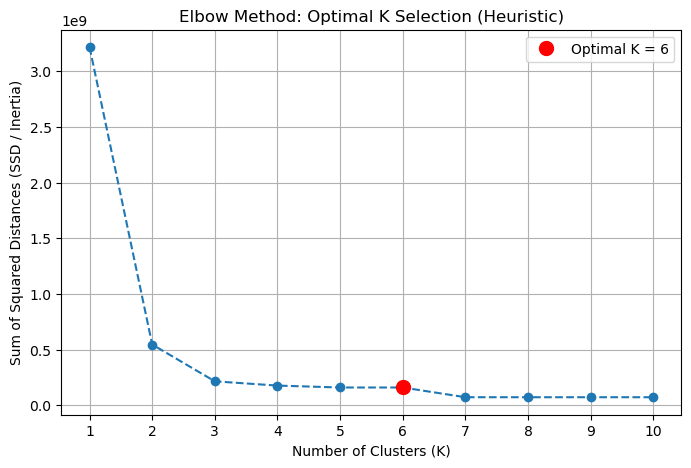


--- Final Classification Results ---
Final Centroids (Integer Values) for K=6: [ 80  31  11  11   0 159]

--- Saving Classified Raster to: Data/Classified_Clipped_LC_Belgium_2022.tif ---
Raster successfully saved!


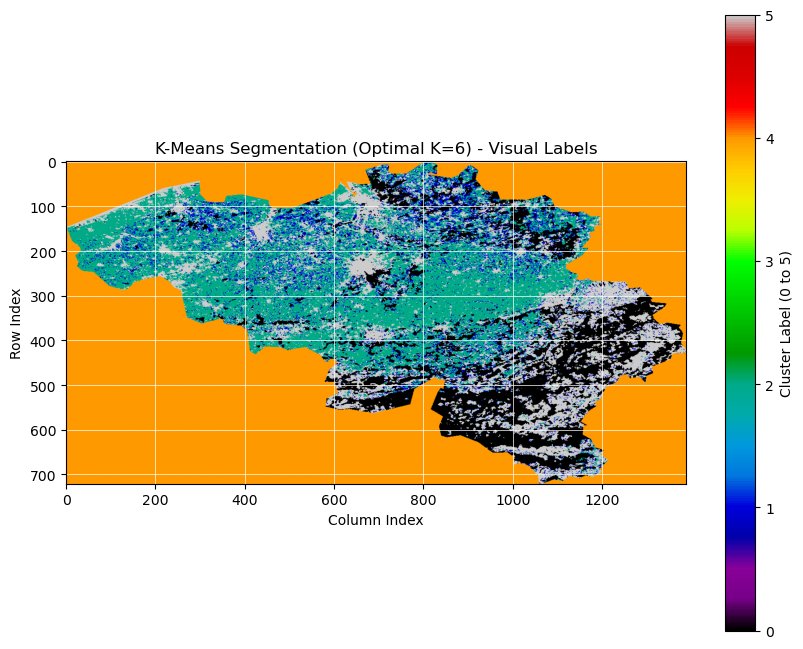

In [3]:
# Classify the raster using the set developed module
max_k = 10
output_classification_path = "Data/Classified_Clipped_LC_Belgium_2022.tif"
cl.classify_single_band_raster(filepath, max_k=max_k, output_path=output_classification_path)

In [4]:
# Reading classified raster and creating Pixel objects for all pixels of the band
with rasterio.open(output_classification_path) as src:
    band1 = src.read(1)
raster_lst = []
shape = band1.shape
count = 0
for y, row in enumerate(band1):
    for x, elt in enumerate(row):
        pix = prc.Pixel(X=x, Y=y, Cluster_value=elt, Group=None)
        raster_lst.append(pix)
        if elt == 0.0:
            count += 1
print(count)

495704


In [5]:
# Create raster object
Raster_object = prc.Raster(lst=raster_lst, shape=shape, groups=[], neighbours_diagonal=False)

In [6]:
# Group all pixels with value 0.0
n_groups, group_sizes = Raster_object._group_raster(0)
n_groups, group_sizes

(437,
 [495633,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  71,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [7]:
# Remove empty groups
Raster_object._remove_empty_groups()
Raster_object.n_groups, Raster_object.group_sizes

(2, [495633, 71])

In [8]:
# Now group all pixels of the other clusters
Raster_object._grouping_process(80)
Raster_object._grouping_process(31)
Raster_object._grouping_process(11)
Raster_object._grouping_process(159)

(32089,
 [495633,
  71,
  1,
  1,
  7,
  1,
  58,
  9,
  1,
  8,
  8,
  5,
  3,
  1,
  32,
  3,
  2918,
  6,
  1,
  235,
  50,
  1,
  1,
  110,
  5,
  48,
  1,
  5,
  2,
  1,
  1,
  2,
  38,
  4,
  8,
  2,
  25,
  30,
  1,
  3,
  1,
  98,
  124,
  33,
  3,
  1,
  2,
  1,
  2,
  3,
  18,
  1,
  2,
  6,
  2,
  7,
  4,
  13,
  5,
  5,
  1,
  7,
  9,
  6,
  1,
  67,
  1,
  205,
  7,
  6,
  8,
  6,
  1,
  1,
  1,
  404,
  1,
  8,
  17,
  6,
  3,
  1,
  1,
  8,
  5,
  3,
  1,
  2,
  7,
  1,
  271,
  2,
  3,
  1,
  2,
  1,
  1,
  9,
  7,
  1,
  1,
  2,
  2,
  1,
  2,
  1,
  1,
  2,
  2,
  1,
  715,
  2,
  1,
  6,
  2,
  1,
  2,
  2,
  2,
  4,
  19,
  1,
  1,
  3,
  2,
  354,
  2,
  12,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  8,
  1,
  2,
  7,
  114,
  2,
  2,
  1,
  2,
  3,
  256,
  3,
  1,
  9,
  2,
  4,
  1,
  1,
  21,
  2,
  1,
  3,
  1,
  14,
  25,
  9,
  47,
  1,
  4,
  1,
  1,
  1,
  1,
  6,
  19,
  3,
  3,
  1,
  1,
  1,
  12,
  1,
  1,
  1,
  9,
  181,
  2,
  21,
  1,
  4,

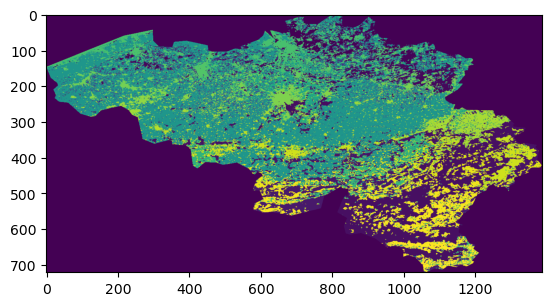

In [9]:
output_grouping_path = "Data/Grouped_Clipped_LC_Belgium_2022.tif"
Raster_object._output_raster(output_path=output_grouping_path, CRS=src.crs)
with rasterio.open(output_grouping_path) as Raster_grouped:
    band = Raster_grouped.read(1)
plt.imshow(band)
plt.show()